# CS171 - Winter 2022 - Assignment 1
### Instructor: Vagelis Papalexakis
### TA: Yorgos Tsitsikas

### Credit for  Assignment 1: 5/40 points of the final grade


In this first assignment you will explore a dataset, visualizing the dataset in various ways, and doing a preliminary analysis on the data. 

For this assignment we are going to use the functionality of Pandas (the library, *not* the unbearably cute animal): https://pandas.pydata.org/ in order to manipulate datasets.
In addition to Pandas, we are going to use Matplotlib (https://matplotlib.org/) and Numpy (http://www.numpy.org/) and you may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

Unless you are explicitly asked to *implement* a particular functionality, you may assume that you may use an existing implementation from the libraries above (or some other library that you may find, as long as you *document* it).

Before you start, make sure you have installed all those packages in your local Jupyter instance, as follows:

conda install numpy pandas matplotlib seaborn

## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random as rand
from numpy.linalg import norm
#make sure you import here everything else you may need

## Question 0: Getting real data [0%] 

In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris


In [2]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Question 1: Data Visualization [20%]

### Question 1a: Scatterplots [10%]
1. Plot the scatterplot of all pairs of features and color the points by class label [5%]
2. Which pair of features is (visually) the most correlated?  [2.5%]
3. Can you think of a reason why looking at this plot would be useful in a task where we would have to classify flowers by label? [2.5%]

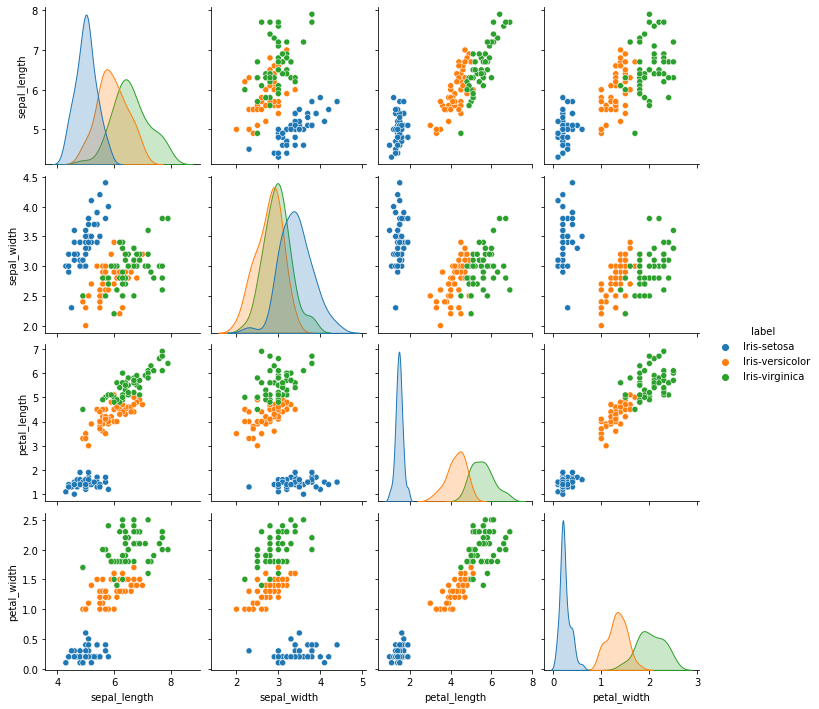

In [3]:
#new to python, used this as a source:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

sns.pairplot(data, hue = "label")
plt.show()

**Your answer here:**

2. petal_length vs petal_width since is almost a linear correlation.

3. It makes it easier to identify the different subspecies of the flower we are looking for. It identifies outliers, and additionally, it helps to see the average dimensions of that flower's structure. In this case, the scatterplots help visualize that average correlation.


### Question 1b: Boxplot and Histogram [10%]

1. Plot the boxplot for each feature of the dataset (you can put all boxplots on a single figure) [4%]
2. Plot the histogram only for petal length [4%]
3. Does the histogram for petal length give more information than the boxplot? If so, what information? [2%]

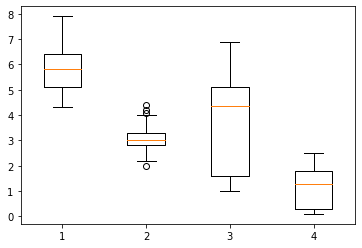

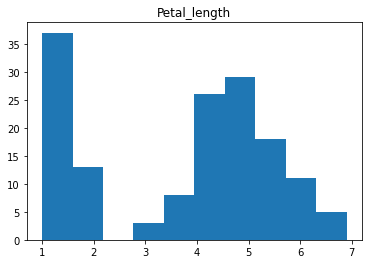

In [4]:
#Boxplot

sepal_l = data["sepal_length"] #number 1 on x-axis
sepal_w = data["sepal_width"]  #number 2 on x-axis
petal_l = data["petal_length"] #number 3 on x-axis
petal_w = data["petal_width"]  #number 4 on x-axis

flower_data = [sepal_l, sepal_w, petal_l, petal_w]
plt.boxplot(flower_data)
plt.show()

#Histogram
plt.hist(petal_l)
plt.title("Petal_length")
plt.show()


**Your answer here:**

3. Histogram gives the frequency for the petal_length for all the data, which is already more information than the box plot can give. With this histogram we can also see the bimodal distribution.

## Question 2: Distance computation [40%]



### Question 2a: Implement the Lp distance function [20%]
1. Write code that implements the Lp distance function between two data points as we saw it in class [15%]
2. Verify that it is correct by comparing it for p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [5%]

In [5]:
#For part 1.
#Lp Norm -> D(X,Y) = the total sum of the abs value of ((xi - yi)^p) all raised to power of (1/p)
#we need x, y, p

#we choose and grab random values from all index
#with the .loc function we can grab any data point
x = np.array(data.loc[rand.randint(0, len(data))])[0:4]
y = np.array(data.loc[rand.randint(0, len(data))])[0:4]  

#we store the random values for x and y 
def D(x,y,p):
    
    Lp_Norm = (sum(abs(x - y)**p))**(1/p)
    return Lp_Norm

print(D(x,y,2))             
               
#For part 2.
#Lp Norm -> d(i,j) = sqrt(of the abs value, total sum of (xi - yi)^2)
#source: https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html

#by given formula in slides
def Lp(x,y):
    
    Lp = (sum(abs(x - y)**2))**(0.5)
    return Lp
print(Lp(x,y))    

#by numpy library
eucledian = norm(x-y)

print(eucledian)


4.616275555033517
4.616275555033517
4.616275555033517


### Question 2b: Compute the distance matrix between all data points [20%]
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points) [5%]
2. Plot the above matrix and include a colorbar. [5%]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [5%]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [5%]

[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


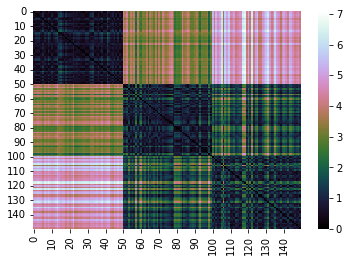

In [6]:
#For part 1.

#source: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
#need to iterate through all values, index[0:4]
#matrix multiplication... 2D array [i][j], for loop to get result matrix
#same matrix n

#n = all data
n = len(data)
#print(n) Shows 150 data points so matrix is 150x150
matrix = np.empty((n,n))

#need to compute the distance between all points then multiply
for i in range(len(matrix)):
    for j in range(len(matrix)):
        #from the previously calculate distance function D(x,y,p)
        x = np.array(data.loc[i])[0:4]
        y = np.array(data.loc[j])[0:4]
        
        matrix[i][j] = D(x,y,2)
print(matrix)
        

#For part 2.
#source: https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

ax = sns.heatmap(matrix, xticklabels=10, yticklabels=10, cmap = "cubehelix")


**Your answer here:**

3. The minimum number of computations should be half of the total count. Since is an NxN matrix, and as such symmetric. The top half should be equal to the bottom half, thus cutting the total by half.

4. The distance matrix in this heatmap shows symmetry, as stated in the previous question. Each class of flower shows that there is little to no difference when comparing with the same class, but it contains a symmetrical distance when comparing between the different classes of flowers.


## Question 3: Data Sampling [40%]

Sometimes datasets are too big, or come in a streaming fashion, and it is impossible for us to process every single data point, so we have to resort to sampling methods. In this question, you will implement the popular "reservoir sampling" method, which is mostly used to obtain a uniform random sample of a data stream. Subsequently, you will experiment with sampling directly all the data and conducting stratified sampling (by class label) and observe the results in the data distribution.

### Question 3a: Reservoir Sampling [20%]
1. Implement reservoir sampling as we saw it in class. Create a 'reservoir_sampling' function because it will be useful for the next question. [15%]
2. Run reservoir sampling with reservoir size $M = 15$ and plot the histogram of the petal length feature for the sampled dataset [5%]

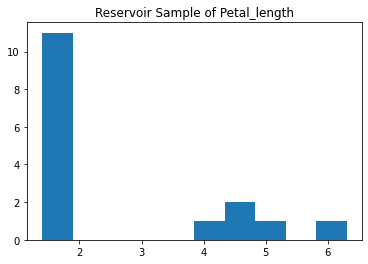

In [7]:
#For part 1.

def reservoir_sampling(stream, M):
    res_sampling = []
    for i in range(len(stream)):
        #Filling the Reservoir 
        if len(res_sampling) <= M:
            res_sampling.append(stream[i])
        else:
            #From slides: when Reservoir is full, M/i to keep or reject data
            j = rand.randint(1, i)
            if j <= M:
                res_sampling[j] = stream[i]
    return res_sampling

#For part 2.
#Histogram

plt.hist(reservoir_sampling(petal_l, 15))
plt.title("Reservoir Sample of Petal_length")
plt.show()

### Question 3b: Stratified Sampling [20%]
1. Implement stratified sampling by class label, and within each stratum use the reservoir sampling function you implemented. [15%]
2. Run your stratified sampler with $M=5$ samples per class (so that we have 15 data points in total) and plot the histogram of the petal length feature for the sampled dataset [2.5%]
3. Do you observe any difference between the stratified and the non-stratified histograms? Which one resembles the original petal length distribution more closely? In order to answer this question you may want to run both sampling procedures a few times and observe which one gives a more accurate result on average. [2.5%]

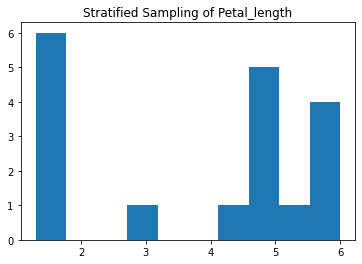

In [8]:
#For part 1.

#Define our strata: the different kinds of iris flower
#Grab the data for each flower and check petal length
#Too many errors when trying to use array. Switched to lists instead.

setosa = data[data['label'] == 'Iris-setosa']['petal_length'].tolist()
versicolor = data[data['label'] == 'Iris-versicolor']['petal_length'].tolist()
virginica = data[data['label'] == 'Iris-virginica']['petal_length'].tolist()

setosa_sample = reservoir_sampling(setosa, 5)
versicolor_sample = reservoir_sampling(versicolor, 5)
virginica_sample = reservoir_sampling(virginica, 5)
    
#For part 2.

#source: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
#source: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
#Histogram

stratified_sampling = np.concatenate([setosa_sample, versicolor_sample, virginica_sample])
plt.hist(stratified_sampling)
plt.title("Stratified Sampling of Petal_length")
plt.show()

**Your answer here:**

3. After a few runs, on average the stratified histogram seems to resemple the original petal_length distribution a lot more. The no-stratified data leans towards a skewed model, while the stratified keeps the bimodal model far more constant on average. This further proofs that statified sampling collects and sorts the data between classes a lot better than reservoir sampling.
